In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd
import scipy

import warnings
warnings.filterwarnings("ignore")

In [2]:
def sigma_ij_operator(i, j, states, N, M):
    """
    Constructs the operator Σ_ij as a matrix that computes the difference in synthetic dimension space
    between sites i and j.

    Parameters:
    i (int): Index of the first site.
    j (int): Index of the second site.
    states (list of lists): List of all states, where each state is represented as a list of occupation numbers.
    N (int): Number of sites.
    M (int): Number of synthetic levels (states per site).

    Returns:
    np.ndarray: The Σ_ij operator as a matrix of shape (dim, dim).
    """
    dim = M**N 
    Sigma_ij = np.zeros((dim, dim))

    for k in range(dim):
        for m in range(M):
            for n in range(M):
                if states[k][i] == m and states[k][j] == n:
                    Sigma_ij[k, k] += abs(m - n)  

    return Sigma_ij

def sigma_ij_from_operator(i, j, wavefunction, states, N, M):
    """
    Computes σ_ij using the operator Σ_ij.

    Parameters:
    i (int): Index of the first site.
    j (int): Index of the second site.
    wavefunction (np.ndarray): State vector of the system.
    states (list of lists): List of all states, where each state is represented as a list of occupation numbers.
    N (int): Number of sites.
    M (int): Number of synthetic levels (states per site).

    Returns:
    float: The sigma value computed as the expectation value of Σ_ij.
    """
    Sigma_ij = sigma_ij_operator(i, j, states, N, M)  # Construct the operator
    expectation_value = np.vdot(wavefunction, Sigma_ij @ wavefunction)  # Compute ⟨ψ|Σ_ij|ψ⟩
    return expectation_value


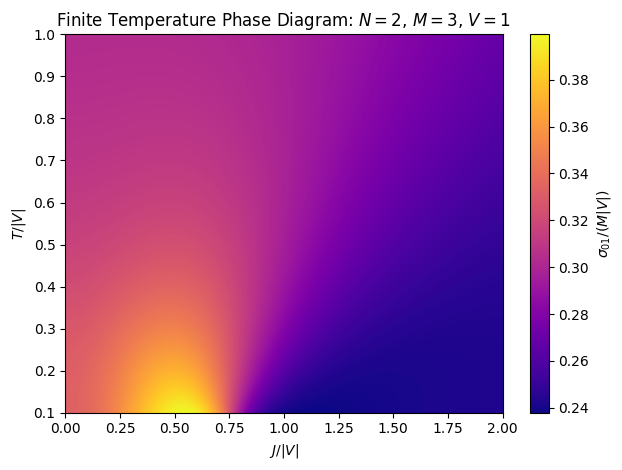

In [10]:
N = 2
M = 3

states, _ = enumerate_states(N,M)

i = 0
j = 1
sigma_op = sigma_ij_operator(i,j,states,N,M)
normalized_sigma_op = sigma_op/M

V = 1
mu_V_ratio = 0

J_V_ratios = np.linspace(0,2,250)
Ts = np.linspace(0.1,1,250)


normalized_sigma_array = np.zeros((len(Ts), len(J_V_ratios)))
for idx1, J_V_ratio in enumerate(J_V_ratios):
    for idx2, T in enumerate(Ts):
        hamiltonian = construct_rescaled_hamiltonian(N, M, V, mu_V_ratio = mu_V_ratio, J_V_ratio = J_V_ratio)
        beta = 1/T
        Z = np.trace(scipy.linalg.expm(-beta * hamiltonian)) 
        density_matrix = scipy.linalg.expm(-beta * hamiltonian) / Z
        normalized_sigma = np.trace(density_matrix @ normalized_sigma_op)
        normalized_sigma_array[idx2,idx1] = normalized_sigma
        
plt.imshow(
    normalized_sigma_array,
    aspect='auto',
    origin='lower',
    cmap='plasma',
    extent=[J_V_ratios[0], J_V_ratios[-1], Ts[0], Ts[-1]],
)
plt.colorbar(label="$\sigma_{01}/(M|V|)$")
plt.xlabel("$J/|V|$")
plt.ylabel("$T/|V|$")
plt.title(f"Finite Temperature Phase Diagram: $N = {N}$, $M = {M}$, $V = {V}$")
plt.tight_layout()
plt.show()